In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")

In [51]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


#### split data first before scaling

In [24]:
# df.drop("User Id", axis=1, inplace=True)
df.drop("User ID", axis=1, inplace=True)

In [25]:
x = df.drop("Purchased", axis=1)
y = df["Purchased"]

In [26]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
x_train.shape, x_test.shape

((280, 2), (120, 2))

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# fit scaler to the train set, it will learn the parameters
scaler.fit(x_train)
# transform train and test sets
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [28]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [32]:
# Now converting the scaled data into dataframe instead of numpy arra
x_train_scaled = pd.DataFrame(x_train_scaled, columns = x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns = x_test.columns) 

In [38]:
x_train_scaled.head()

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047


In [40]:
np.round(x_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


### Effects of scaling

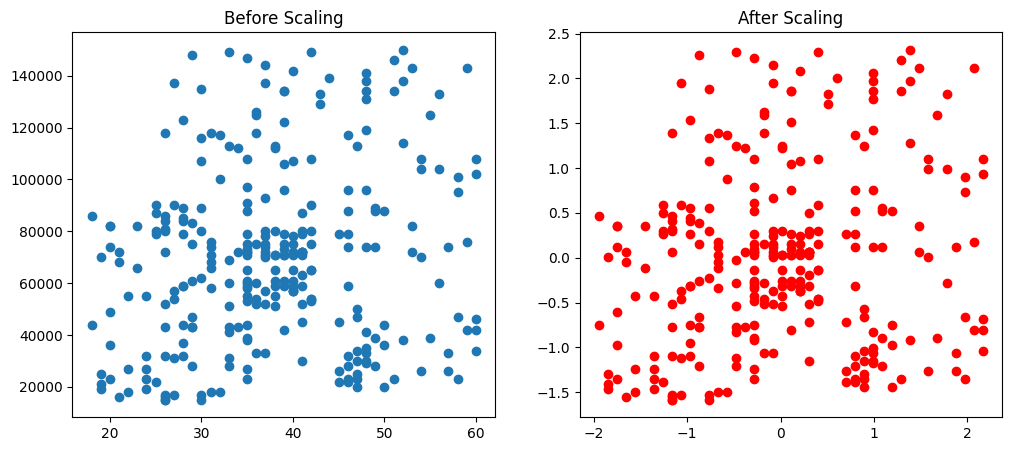

In [41]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.scatter(x_train['Age'], x_train["EstimatedSalary"])
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaled["Age"], x_train_scaled["EstimatedSalary"], color="red")
ax2.set_title("After Scaling")
plt.show()

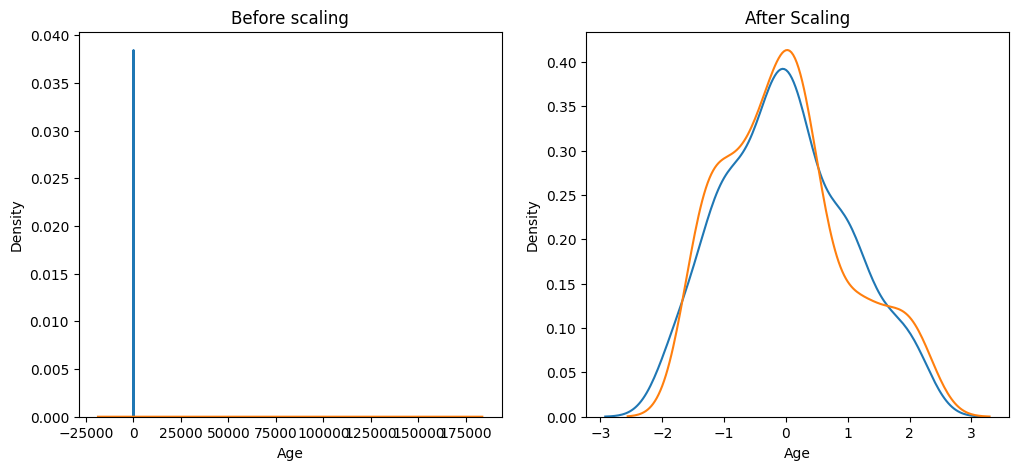

In [46]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.set_title("Before scaling")
sns.kdeplot(x_train["Age"], ax=ax1)
sns.kdeplot(x_train["EstimatedSalary"], ax=ax1);

ax2.set_title("After Scaling")
sns.kdeplot(x_train_scaled["Age"], ax=ax2)
sns.kdeplot(x_train_scaled["EstimatedSalary"], ax=ax2)
plt.show()

In [47]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [48]:
lr.fit(x_train, y_train)
lr_scaled.fit(x_train_scaled, y_train)

LogisticRegression()

In [49]:
y_preds = lr.predict(x_test)
y_preds_scaled = lr_scaled.predict(x_test_scaled)

In [50]:
from sklearn.metrics import accuracy_score
print("Actual", accuracy_score(y_test, y_preds))
print("Scaled", accuracy_score(y_test, y_preds_scaled))

Actual 0.875
Scaled 0.8666666666666667


In [59]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn_scaled = KNeighborsClassifier(n_neighbors=10)

knn.fit(x_train, y_train)
knn_scaled.fit(x_train_scaled, y_train)

knn_y_preds = knn.predict(x_test)
knn_y_preds_scaled = knn_scaled.predict(x_test_scaled)

print("Actual", accuracy_score(y_test, knn_y_preds))
print("Scaled", accuracy_score(y_test, knn_y_preds_scaled))

Actual 0.8416666666666667
Scaled 0.925


In [62]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf_scaled = RandomForestClassifier()

rf.fit(x_train, y_train)
rf_scaled.fit(x_train_scaled, y_train)

rf_y_preds = rf.predict(x_test)
rf_y_preds_scaled = rf_scaled.predict(x_test_scaled)

print("Actual", accuracy_score(y_test, rf_y_preds))
print("Scaled", accuracy_score(y_test, rf_y_preds_scaled))

Actual 0.925
Scaled 0.9083333333333333
